# MSE MachLe -- Trees and Forests
**Helmut Grabner, Autum Term, 2020**

### Objectives:
+ Application of decisiontrees and their visualization
+ Apply Random Fores on categorical target variables
+ Apply Random Fores to text data

### Questions:
+ How is the splitting of the data into subsets made in bagging/boosting ?
+ What is the goal we try to achieve in bagging/boosting?
+ What additional method is used by Random Forest compared to bagging trees.
+ How many trees make a Forest?
+ How does Random Forest relate to decision trees and bagging.
+ Why are Random Forest robust against outliers?

### Hints:
+ Decision Trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
+ Tree Plot:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
+ Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
+ OOB: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html


## Example 1: Decision Trees

- Split the data into a train and a testset.

- Apply a decisiontree classifier to the data and visualize your decision tree.

- Make a prediction for the test set and plot the confusion matrix. 

- Try different settings for the parameters  `min_samples_leaf` and `max_depth` in the classifier. What is you best accuracy?

- Try to interprete the estimate of the class distribution ('values' in the nodes) of your tree. 



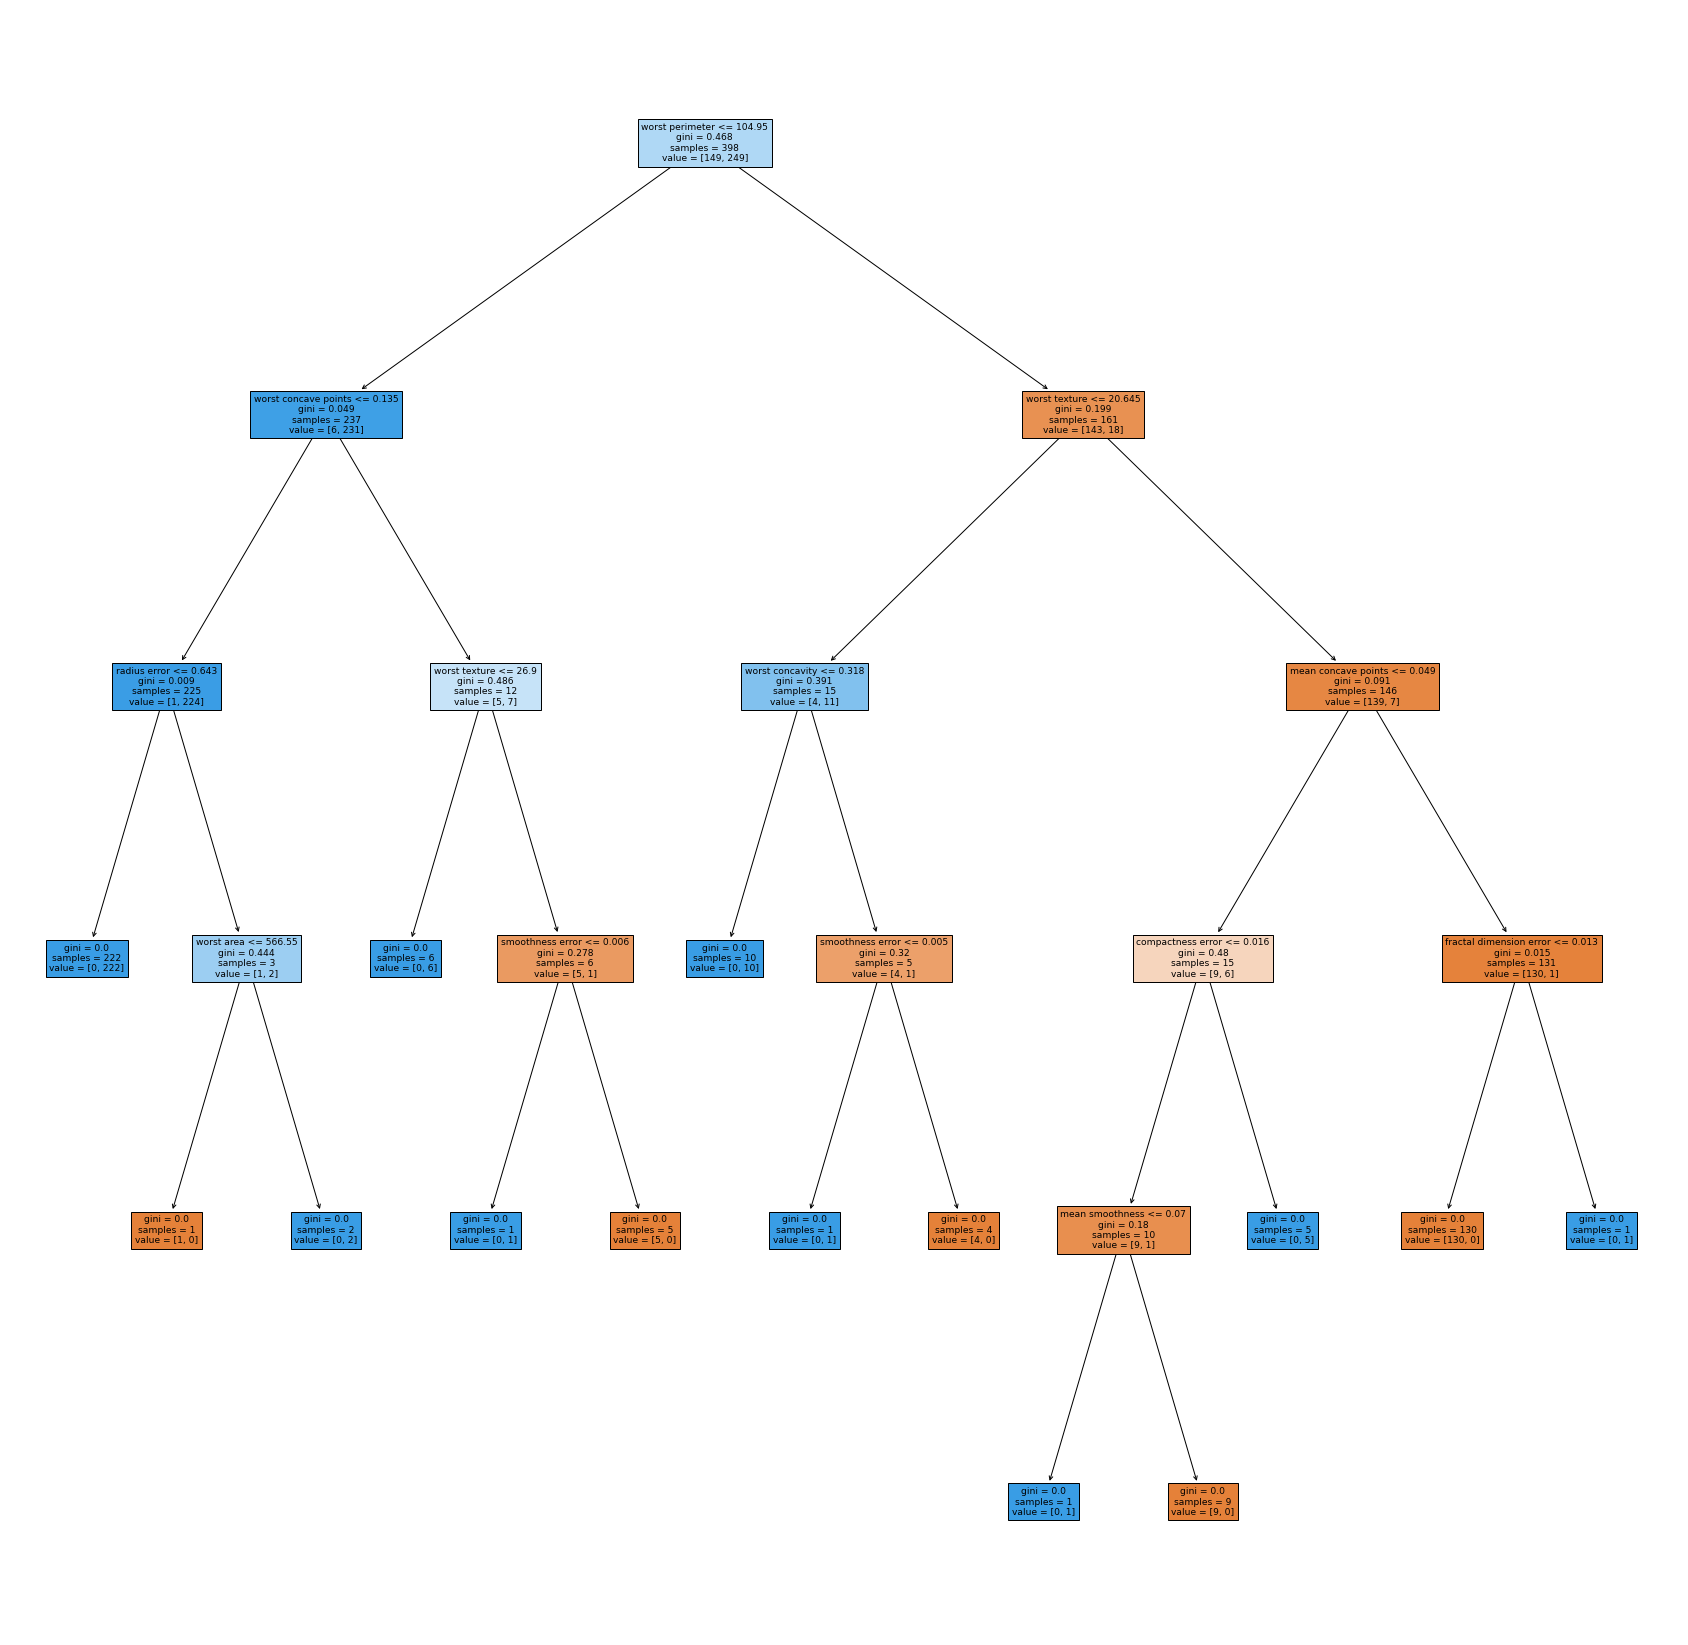

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline
np.random.seed(1)
plt.figure(figsize=(30,30))

# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Apply a decisiontree classifier to the data and visualize your decision tree
#### START YOUR CODE HERE ####
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)

# fit model 
clf = DecisionTreeClassifier(min_samples_leaf=1 , max_depth = None)
clf = clf.fit(trainX, trainy)

# Plot tree
plot_tree(clf, filled=True, feature_names=cancer.feature_names)
plt.show()

#### END YOUR CODE HERE ####


### Add your interpretations and findings here:
...

In [ ]:
# Make a prediction for the test set, Try different settings for the parameters "min_samples_leaf" and "max_depth" 

#### START YOUR CODE HERE ####
# Get predictions
pred = clf.predict(testX)

acc_0 = accuracy_score(pred, testy)
print( "Performance measurements", "\n",
       "accuracy  : ", round(acc_0,3),"\n")

#### END YOUR CODE HERE ####

Performance measurements 
 accuracy  :  0.912 



## Example 2: Random Forest
- Split the data into a train and a testset. 
- Apply a random forest classifier to the data.
- Print the test and train accuracy and compare it to the out of bag score (hint: set `oob_score = True` in classifier).

- Visualize the importance plot and interprete it.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
np.random.seed(1)

# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

labels = cancer.target_names
features = cancer.feature_names


# Apply a random forest to the data 
#### START YOUR CODE HERE ####

#split the dataset into training and testing
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)

# fit model 
clf = RandomForestClassifier(n_estimators=100, oob_score=True)
clf = clf.fit(trainX, trainy)

# predict
pred_train = clf.predict(trainX)
pred = clf.predict(testX)

# accuracy
acc_test = accuracy_score(pred, testy)
acc_train = accuracy_score(pred_train, trainy)
acc_oob = clf.oob_score_

#### END YOUR CODE HERE ####

print( "Performance measurements", "\n",
       "train accuracy      : ", round(acc_train,3),"\n",
       "test accuracy       : ", round(acc_test,3), "\n",
       "out of bag accuracy : ", round(acc_oob,3),"\n"
       )



Performance measurements 
 train accuracy      :  1.0 
 test accuracy       :  0.959 
 out of bag accuracy :  0.955 



## Add your interpretations and findings here:
...

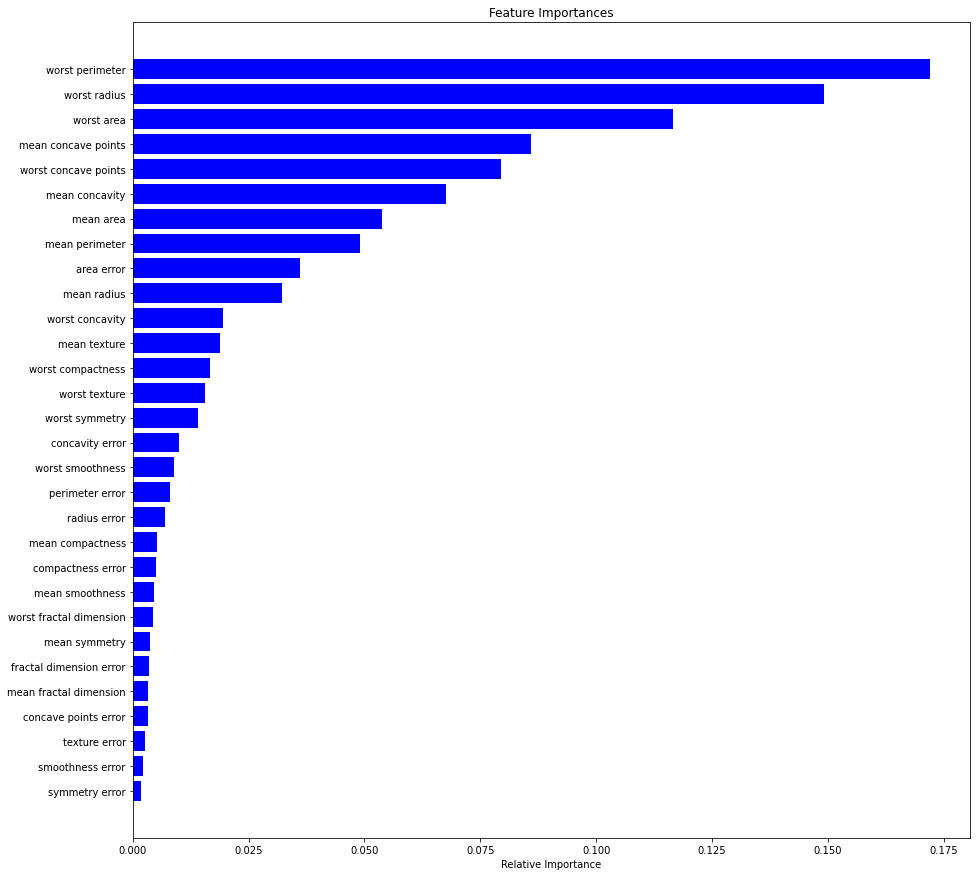

In [ ]:
# retrieve the relative importance of each variable and visualize the importance plot

#### START YOUR CODE HERE ####

importances = clf.feature_importances_

#### END YOUR CODE HERE ####

indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Add your interpretations and findings here:
...

## Example 3: Sentiment analysis with IMDB reviews

In this notebook we work with the IMDb dataset, it is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDB) labeled as positive (1) or negative (0). 

A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. We will apply a very simple preprocessing to the textreviews and then train a baseline randomforest on bag of words features. 

You can test the trained model on new reviews from the internet or by writting your own review for a movie you like or don't like.

Follow the instructions in the cells!

In [1]:
# Downloading the reviews and labels
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer  
%matplotlib inline

df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [2]:
# data labelling
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
X = df.loc[0:50000, 'review'].values
y = df.loc[0:50000, 'sentiment'].values

# data preparation
def text_proc(X):
    documents = []
    for i in range(0, len(X)):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[i]))
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        # Removing html stuff
        document = re.sub("br", '', document)
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Converting to Lowercase
        document = document.lower()
        documents.append(document)
    
    return documents

documents = text_proc(X)

# vectorize the input data
vectorizer = CountVectorizer(max_features=6000, min_df=5, max_df=0.7)
X = vectorizer.fit_transform(documents).toarray()

# Define train and test data
X_train = X[0:25000]
y_train = y[0:25000]
X_test = X[25000:50000]
y_test = y[25000:50000]

In [6]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# create a random forest classifier and make sentiment predictions for the movie reviews
# compare your test accuracy with your out of bag score and interprete it

#### START YOUR CODE HERE ####

clf = RandomForestClassifier(n_estimators=100, random_state=36, oob_score=True)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# accuracy
acc = accuracy_score(y_pred, y_test)

#### START YOUR CODE HERE ####

print( "Performance measurements", "\n",
       "test accuracy       : ", round(acc,3), "\n",
       "out of bag accuracy : ", round(clf.oob_score_,3),"\n"
       )


Performance measurements 
 test accuracy       :  0.844 
 out of bag accuracy :  0.825 



### Add your interpretations and findings here:
...

In [20]:
# Write a positive, a negative and a neutral movie review into the saample list and interprete the prediction probability

sample=list(["YOUR_SENTENCE",
             "YOUR_SENTENCE",
             "YOUR_SENTENCE"
            ])

sample=list(["this was a very bad movie and the actor was so horrible",
             "this was a very bad movie and the actor was so horrible but i still liked it very much",
             "this was actually a great movie."
            ])

X_pred = text_proc(sample)
X_pred = vectorizer.transform(X_pred).toarray() 
print(clf.predict_proba(X_pred))

[[0.83 0.17]
 [0.77 0.23]
 [0.09 0.91]]


### Add your interpretations and findings here:
...